Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

импортируем необходимые библиотеки и сохраним данные автомобилей компании «Чётенькое такси»

In [335]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler 
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
#from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [336]:
data = pd.read_csv('/datasets/taxi.csv')

выведем первые 10 строк таблицы:

In [337]:
data.head(10)

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
5,2018-03-01 00:50:00,21
6,2018-03-01 01:00:00,7
7,2018-03-01 01:10:00,5
8,2018-03-01 01:20:00,17
9,2018-03-01 01:30:00,12


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


пропусков не обнаружено

сменим тип данных столбца datatime с object на datetime64:

In [339]:
data['datetime']=pd.to_datetime(data['datetime'])

и посмотрим что тип изменился:

In [340]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    26496 non-null  datetime64[ns]
 1   num_orders  26496 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


проверим что данные идут в хронологическом порядке:

In [341]:
print(data['datetime'].index.is_monotonic)

True


выполним ресэмплирование по одному часу, но сначала сохраним столбец datetime как индекс.

In [342]:
data = data.set_index('datetime')

проверим что все верно:

In [343]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


выполним ресэмплирование :

In [344]:
data=data.resample('1H').sum()

In [345]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


ресэмплирование по одному часу прошло успешно, теперь все данные представлены через 1 час. Перейдем к анализу данных

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

## Анализ

построим график времяного ряда

<AxesSubplot:xlabel='datetime'>

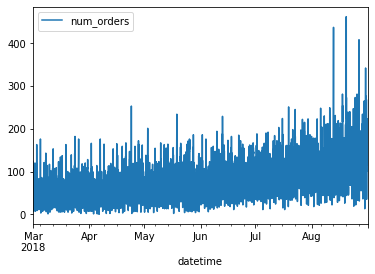

In [346]:
data.plot()

кажется что со временем время заказов увеличивается. Снизим коллебания и построим скользящее среднее размеров 24 часа, то есть одних суток

<AxesSubplot:xlabel='datetime'>

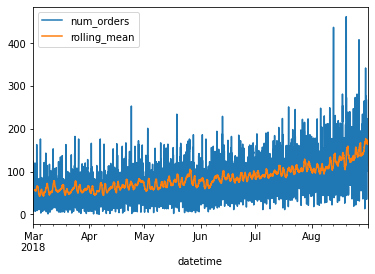

In [347]:
data['rolling_mean'] = data.rolling(24).mean() 
data.plot()

изменим скользящее окно и построим график за 10 дней

<AxesSubplot:xlabel='datetime'>

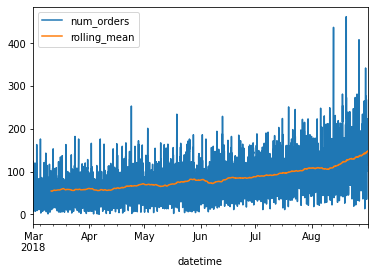

In [348]:
data['rolling_mean'] = data.rolling(240).mean() 
data.plot()

действительно, видно что с марта по конец августа число заказов увеличивается.

In [349]:
data=data.drop(['rolling_mean'], axis=1)

построим графики сезонной составляющей и трендовой составляющей

/tmp/ipykernel_31/2550082578.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:title={'center':'Trend'}, xlabel='datetime'>

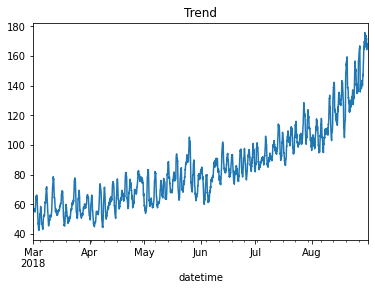

In [350]:
decomposed = seasonal_decompose(data)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot()

/tmp/ipykernel_31/1570972586.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:title={'center':'Seasonality'}, xlabel='datetime'>

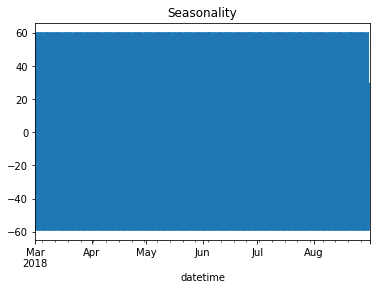

In [351]:
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot()

ограничим график график сезонности одной неделей

/tmp/ipykernel_31/4096049021.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


<AxesSubplot:title={'center':'Seasonality'}, xlabel='datetime'>

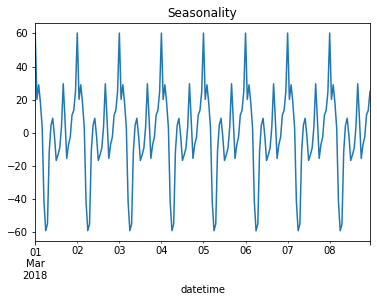

In [352]:
decomposed.seasonal['2018-03-01':'2018-03-08'].plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot()

И одним днем

<AxesSubplot:xlabel='datetime'>

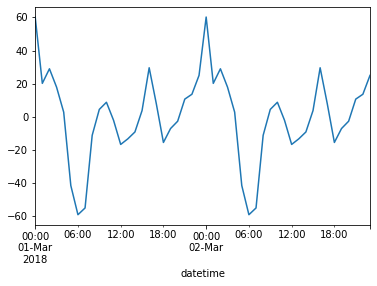

In [353]:
decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca()) 

видно что пик заказов такси приходится на 12 ночи, потом падает до 6 утра, где находится минимум заказов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. Хорошо, что сезонность была визуализирована на более коротком интервале!
</div>

## Обучение

Напишем функцию make_features, чтобы добавить к таблицу 4 новых столбца признака, отстающие значения и скользящее среднее:

In [354]:
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return df

<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно было написать функцию таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> изменил функцию, добавил return df и вместо data везде написал df
</div>

<div class="alert alert-block alert-info">

<b>Совет (ревью 2): </b> В первой строке надо было сделать так: `new_df = df.copy()`. Все изменения сделать c new_df.
</div>

применим функцию и выведем первые 5 строк

In [355]:
make_features(data, 30, 50)
print(data.head())

                     num_orders  year  month  day  dayofweek  lag_1  lag_2  \
datetime                                                                     
2018-03-01 00:00:00         124  2018      3    1          3    NaN    NaN   
2018-03-01 01:00:00          85  2018      3    1          3  124.0    NaN   
2018-03-01 02:00:00          71  2018      3    1          3   85.0  124.0   
2018-03-01 03:00:00          66  2018      3    1          3   71.0   85.0   
2018-03-01 04:00:00          43  2018      3    1          3   66.0   71.0   

                     lag_3  lag_4  lag_5  ...  lag_22  lag_23  lag_24  lag_25  \
datetime                                  ...                                   
2018-03-01 00:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 01:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 02:00:00    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN   
2018-03-01 03:00:00  124.0    NaN    NaN  ...   

Разобьем датасет о потреблении электроэнергии на обучающую и тестовую выборки, так чтобы тестовая составляла 10%

In [356]:
train, test = train_test_split(data, shuffle=False, test_size=0.1)

получить данные из первых значений невозможно, удалим пустые значения из первых четырех строк:

In [357]:
train = train.dropna()

убедимся в корректности деления и выведем начало и конец каждой выборки:

In [358]:
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-03 02:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


все верно, выделим признаки и целевой признак в обучающей и тестовой выборках:

In [359]:
features_train=train.drop(['num_orders'],axis=1)
target_train=train['num_orders']

features_test=test.drop(['num_orders'],axis=1)
target_test=test['num_orders']

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано корректно.
</div>

## Тестирование

Обучим модель линейной регрессии

In [360]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression()

сделаем предсказание и посчитаем значение метрики RMSE на тестовой выборке 

In [361]:
pred=model.predict(features_train)

predict=model.predict(features_test)
print("RMSE тестовой выборки: ",  mean_squared_error(target_test, predict,squared=False))

RMSE тестовой выборки:  45.9358016074224


Подеберм лучшие параметры для модели CatBoostRegressor используя grid_search:

In [362]:
tscv = TimeSeriesSplit(n_splits=10)

model = CatBoostRegressor()

grid = {'learning_rate': [0.05, 0.1,0.5],
        'depth': [4, 6, 10],
        'iterations': [100,200,300,400]}

grid_search_result = model.grid_search(param_grid=grid, 
                                       cv=tscv,
                                       X=features_train, 
                                       y=target_train,
                                       plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 75.9913326	test: 110.8273639	best: 110.8273639 (0)	total: 3.09ms	remaining: 306ms
1:	learn: 72.7656224	test: 107.0186944	best: 107.0186944 (1)	total: 6.24ms	remaining: 306ms
2:	learn: 69.7897638	test: 103.6788889	best: 103.6788889 (2)	total: 9.11ms	remaining: 295ms
3:	learn: 66.9395217	test: 100.2946465	best: 100.2946465 (3)	total: 12.2ms	remaining: 292ms
4:	learn: 64.2938244	test: 97.3307778	best: 97.3307778 (4)	total: 15.2ms	remaining: 289ms
5:	learn: 61.7751079	test: 94.0792909	best: 94.0792909 (5)	total: 17.8ms	remaining: 279ms
6:	learn: 59.3764983	test: 90.8934889	best: 90.8934889 (6)	total: 20.8ms	remaining: 276ms
7:	learn: 56.9940025	test: 87.9784769	best: 87.9784769 (7)	total: 23.5ms	remaining: 270ms
8:	learn: 54.8028014	test: 85.4982269	best: 85.4982269 (8)	total: 26.1ms	remaining: 264ms
9:	learn: 52.7176714	test: 82.8688509	best: 82.8688509 (9)	total: 28.7ms	remaining: 258ms
10:	learn: 50.7457393	test: 80.5335572	best: 80.5335572 (10)	total: 31.4ms	remaining: 254ms


In [363]:
grid_search_result['params']

{'depth': 4, 'iterations': 400, 'learning_rate': 0.05}

сделаем предсказание модели используя лучшие параметры и посчитаем значение метрики RMSE:

In [364]:
model = CatBoostRegressor(depth=4,iterations=400,learning_rate=0.05,verbose=100)
model.fit(features_train, target_train)

pred=model.predict(features_train)

predict=model.predict(features_test)
print("RMSE тестовой выборки: ",  mean_squared_error(target_test, predict,squared=False))

0:	learn: 37.8400502	total: 3.11ms	remaining: 1.24s
100:	learn: 24.0776707	total: 277ms	remaining: 821ms
200:	learn: 22.2721547	total: 563ms	remaining: 558ms
300:	learn: 20.8334050	total: 833ms	remaining: 274ms
399:	learn: 19.6952257	total: 1.1s	remaining: 0us
RMSE тестовой выборки:  43.27315135222842


обучим модель LightGBM и аналогично получим значение для него:

In [365]:
LightGBM = LGBMRegressor(n_estimators=100,num_leaves=100,random_state=42)
LightGBM.fit(features_train, target_train)

predict = LightGBM.predict(features_test)

print("RMSE тестовой выборки: ",  mean_squared_error(target_test, predict,squared=False))

RMSE тестовой выборки:  42.88955348432348


модель LGBMRegressor получила наименьшее RMSE.

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, хотя бы для одной из моделей реализуй подбор параметров. Я бы использовал кросс-валидацию. При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Финальные предсказания можно было визуализирвоать: графики исходного и предсказанных рядов.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> сделал подбор параметров для CAtboost используя TimeSeriesSplit и grid_search
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48